<a href="https://colab.research.google.com/github/ashwin951/linear_regression/blob/master/Logistic_Regression_with_Titanic_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [0]:
import pandas as pd 
import numpy as np


In [0]:
# for visualization of dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import dataset

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
titanic_gender_submission = pd.read_csv('/content/gender_submission.csv')

In [7]:
train.head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
test.head(n=2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [9]:
titanic_gender_submission.head(n=5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
test = pd.merge(test,titanic_gender_submission)

Train data preprocessing

For checking presence of missing values 

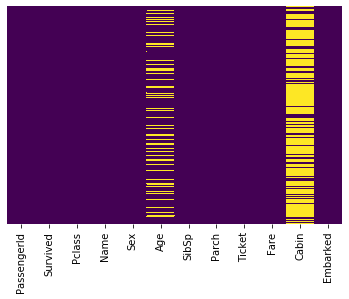

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

From the heatmap it's clear that Age and Cabin has null values present in them. Since Age is continious value we can fill them with mean of the overall age. Before that let's do some analysis based on age. 

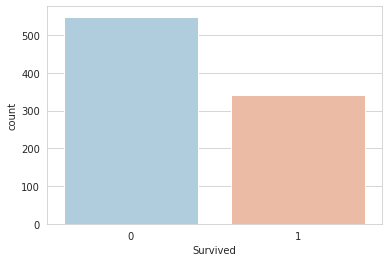

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

Number of people survived is less than that of people not survived.

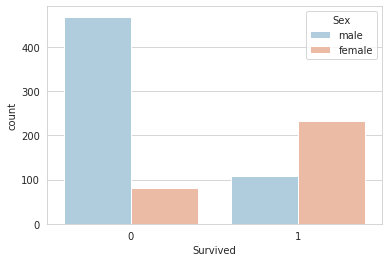

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

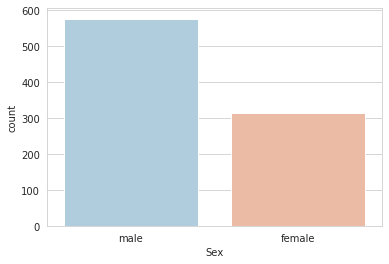

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=train,palette='RdBu_r')

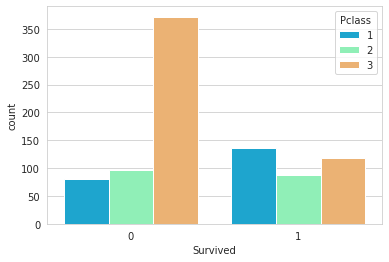

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

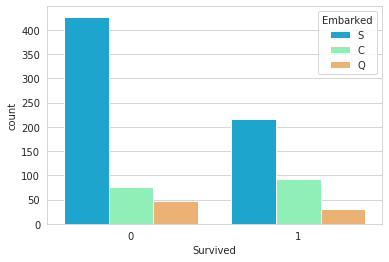

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train,palette='rainbow')

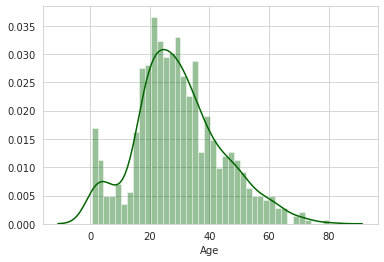

In [17]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkgreen',bins=40)

Above histogram plot shows age is more right skewed that means it was more young people on board. 

In [18]:
print('Above sentence can be mathematically proved, with mean = {} and median = {}, since mean is greater than median it is skewed right'.format(train['Age'].mean(),train['Age'].median()))

Above sentence can be mathematically proved, with mean = 29.69911764705882 and median = 28.0, since mean is greater than median it is skewed right


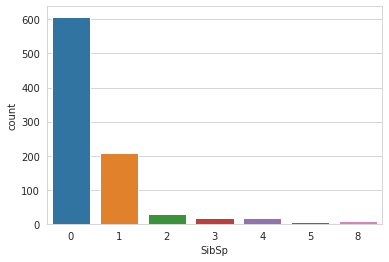

In [19]:
sns.countplot(x='SibSp',data=train)

This shows most of the people on board are traveling solo. This can be read with age distribution, since age distribution plot shows most of the passengers are between 20 and 30 and count of male passengers is more than female.


Data Cleaning: Need to impute the Age column. Fill missing values with average of age column

---



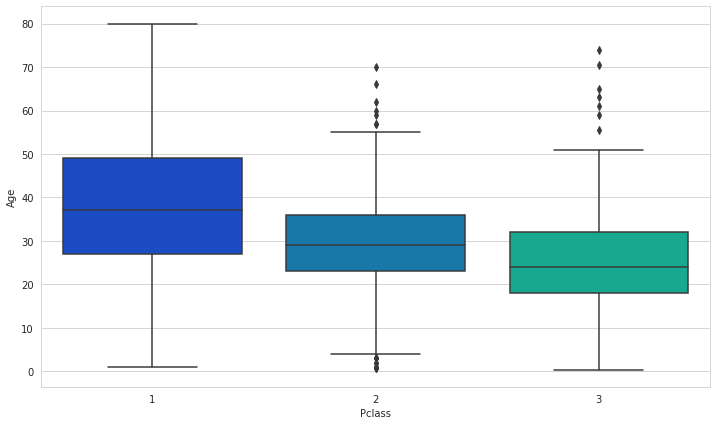

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [21]:
train['Pclass'].unique()

array([3, 1, 2])

In [0]:
mean_of_age = []
for i in train['Pclass'].unique():
  mean_of_age.append(train['Age'][train['Pclass'] == i].mean())

In [0]:
mean_of_age = [round(i) for i in mean_of_age]

In [24]:
mean_of_age

[25, 38, 30]

For imputing age consider the following function which return the value mean of age in each class of pclass

In [0]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

Apply the function in train['Age'] column

In [0]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Check again for missing values  in age

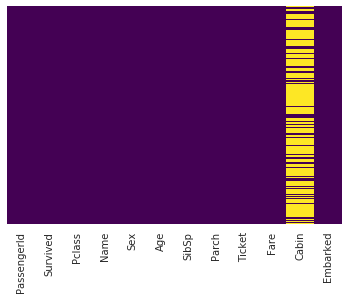

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since cabin is a categorical value  and it contains high densitity missing values we can drop cabin from the dataset

In [28]:
train['Cabin'].isnull().sum()

687

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
percentage_of_null_values = train['Cabin'].isnull().sum()/(train['Cabin'].count() + train['Cabin'].isnull().sum())

In [0]:
percentage_of_null_values = percentage_of_null_values * 100

In [32]:
print('percentage of null values  in Cabin {} %'.format(percentage_of_null_values))

percentage of null values  in Cabin 77.10437710437711 %


Since 77% values are null we can drop Cabin from train data.

In [0]:
train.drop('Cabin',axis=1,inplace=True)

In [34]:
train.head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Column embarked also has 2 null values so let's drop those two recordes also.

In [0]:
train.dropna(inplace=True)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


We need to encode Sex and embarked since both are in string.

In [0]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [0]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [0]:
train = pd.concat([train,sex,embark],axis=1)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Train dataset is ready for training. Now same technique for test dataset

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


Heat map of test dataset

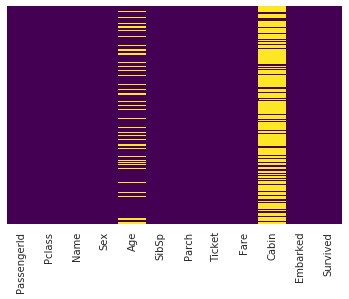

In [43]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False, cmap='viridis')

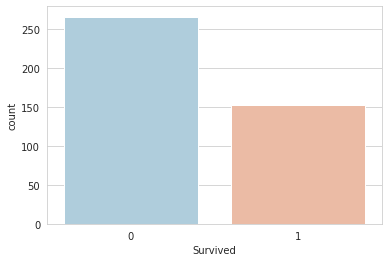

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=test,palette='RdBu_r')

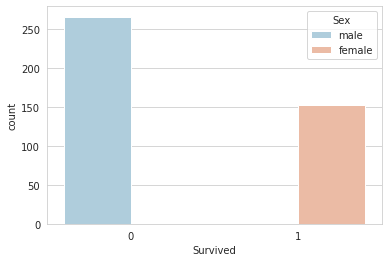

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=test,palette='RdBu_r')

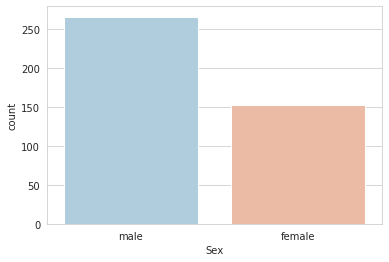

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=test,palette='RdBu_r')

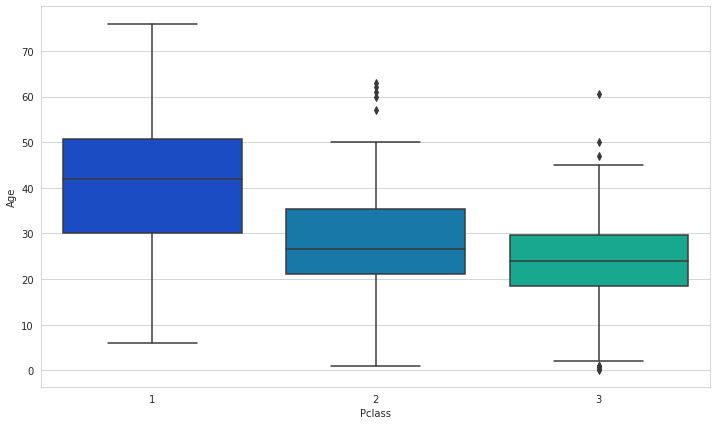

In [47]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [0]:
mean_of_age = []
for i in test['Pclass'].unique():
  mean_of_age.append(test['Age'][test['Pclass'] == i].mean())

In [0]:
mean_of_age = [round(i) for i in mean_of_age]

In [50]:
mean_of_age

[24, 29, 41]

In [0]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 24

        elif Pclass == 2:
            return 29

        else:
            return 41

    else:
        return Age

In [0]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [53]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,41.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,41.0,0,0,359309,8.0500,NaN,S,0


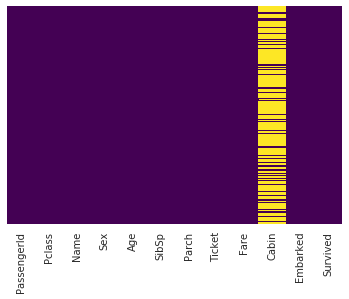

In [54]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
test.drop('Cabin',axis=1,inplace=True)

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 59.2+ KB


In [0]:
test.dropna(inplace=True)

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Name           417 non-null object
Sex            417 non-null object
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Ticket         417 non-null object
Fare           417 non-null float64
Embarked       417 non-null object
Survived       417 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [0]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [0]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [0]:
test = pd.concat([test,sex,embark],axis=1)

In [62]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,892,3,34.5,0,0,7.8292,0,1,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1


Training the model and Predicting

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()


In [0]:
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)
y_train = train['Survived']
y_test = test['Survived']

In [68]:
logmodel.fit(X_train,y_train)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
predictions = logmodel.predict(X_test)

Evaluation of Model

In [0]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       265
           1       0.87      0.94      0.90       152

    accuracy                           0.93       417
   macro avg       0.92      0.93      0.92       417
weighted avg       0.93      0.93      0.93       417



In [74]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[243,  22],
       [  9, 143]])

Text(0.5, 257.44, 'Predicted label')

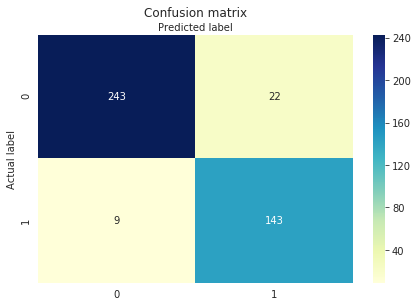

In [75]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.9256594724220624
Precision: 0.8666666666666667
Recall: 0.9407894736842105
